1. Analyse the data using the visualizations

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("D:\Assignments Data Science ExcelR\KNN\KNN\Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


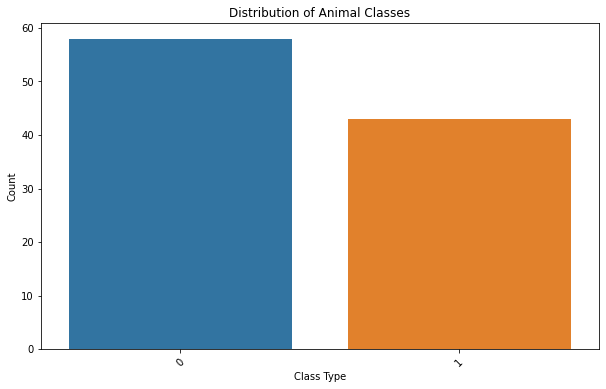

In [6]:
# Visualize the distribution of different animal classes
plt.figure(figsize=(10, 6))
sns.countplot(x='hair', data=df)
plt.title('Distribution of Animal Classes')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

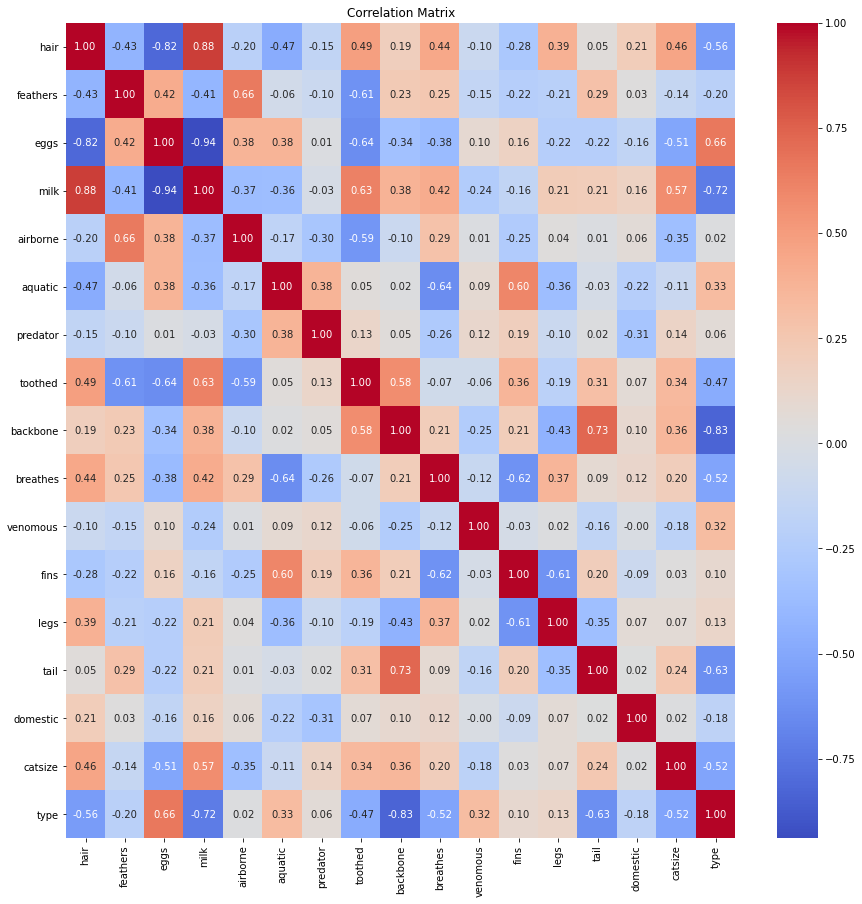

In [9]:
# Visualize correlations between numerical features
plt.figure(figsize=(15, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


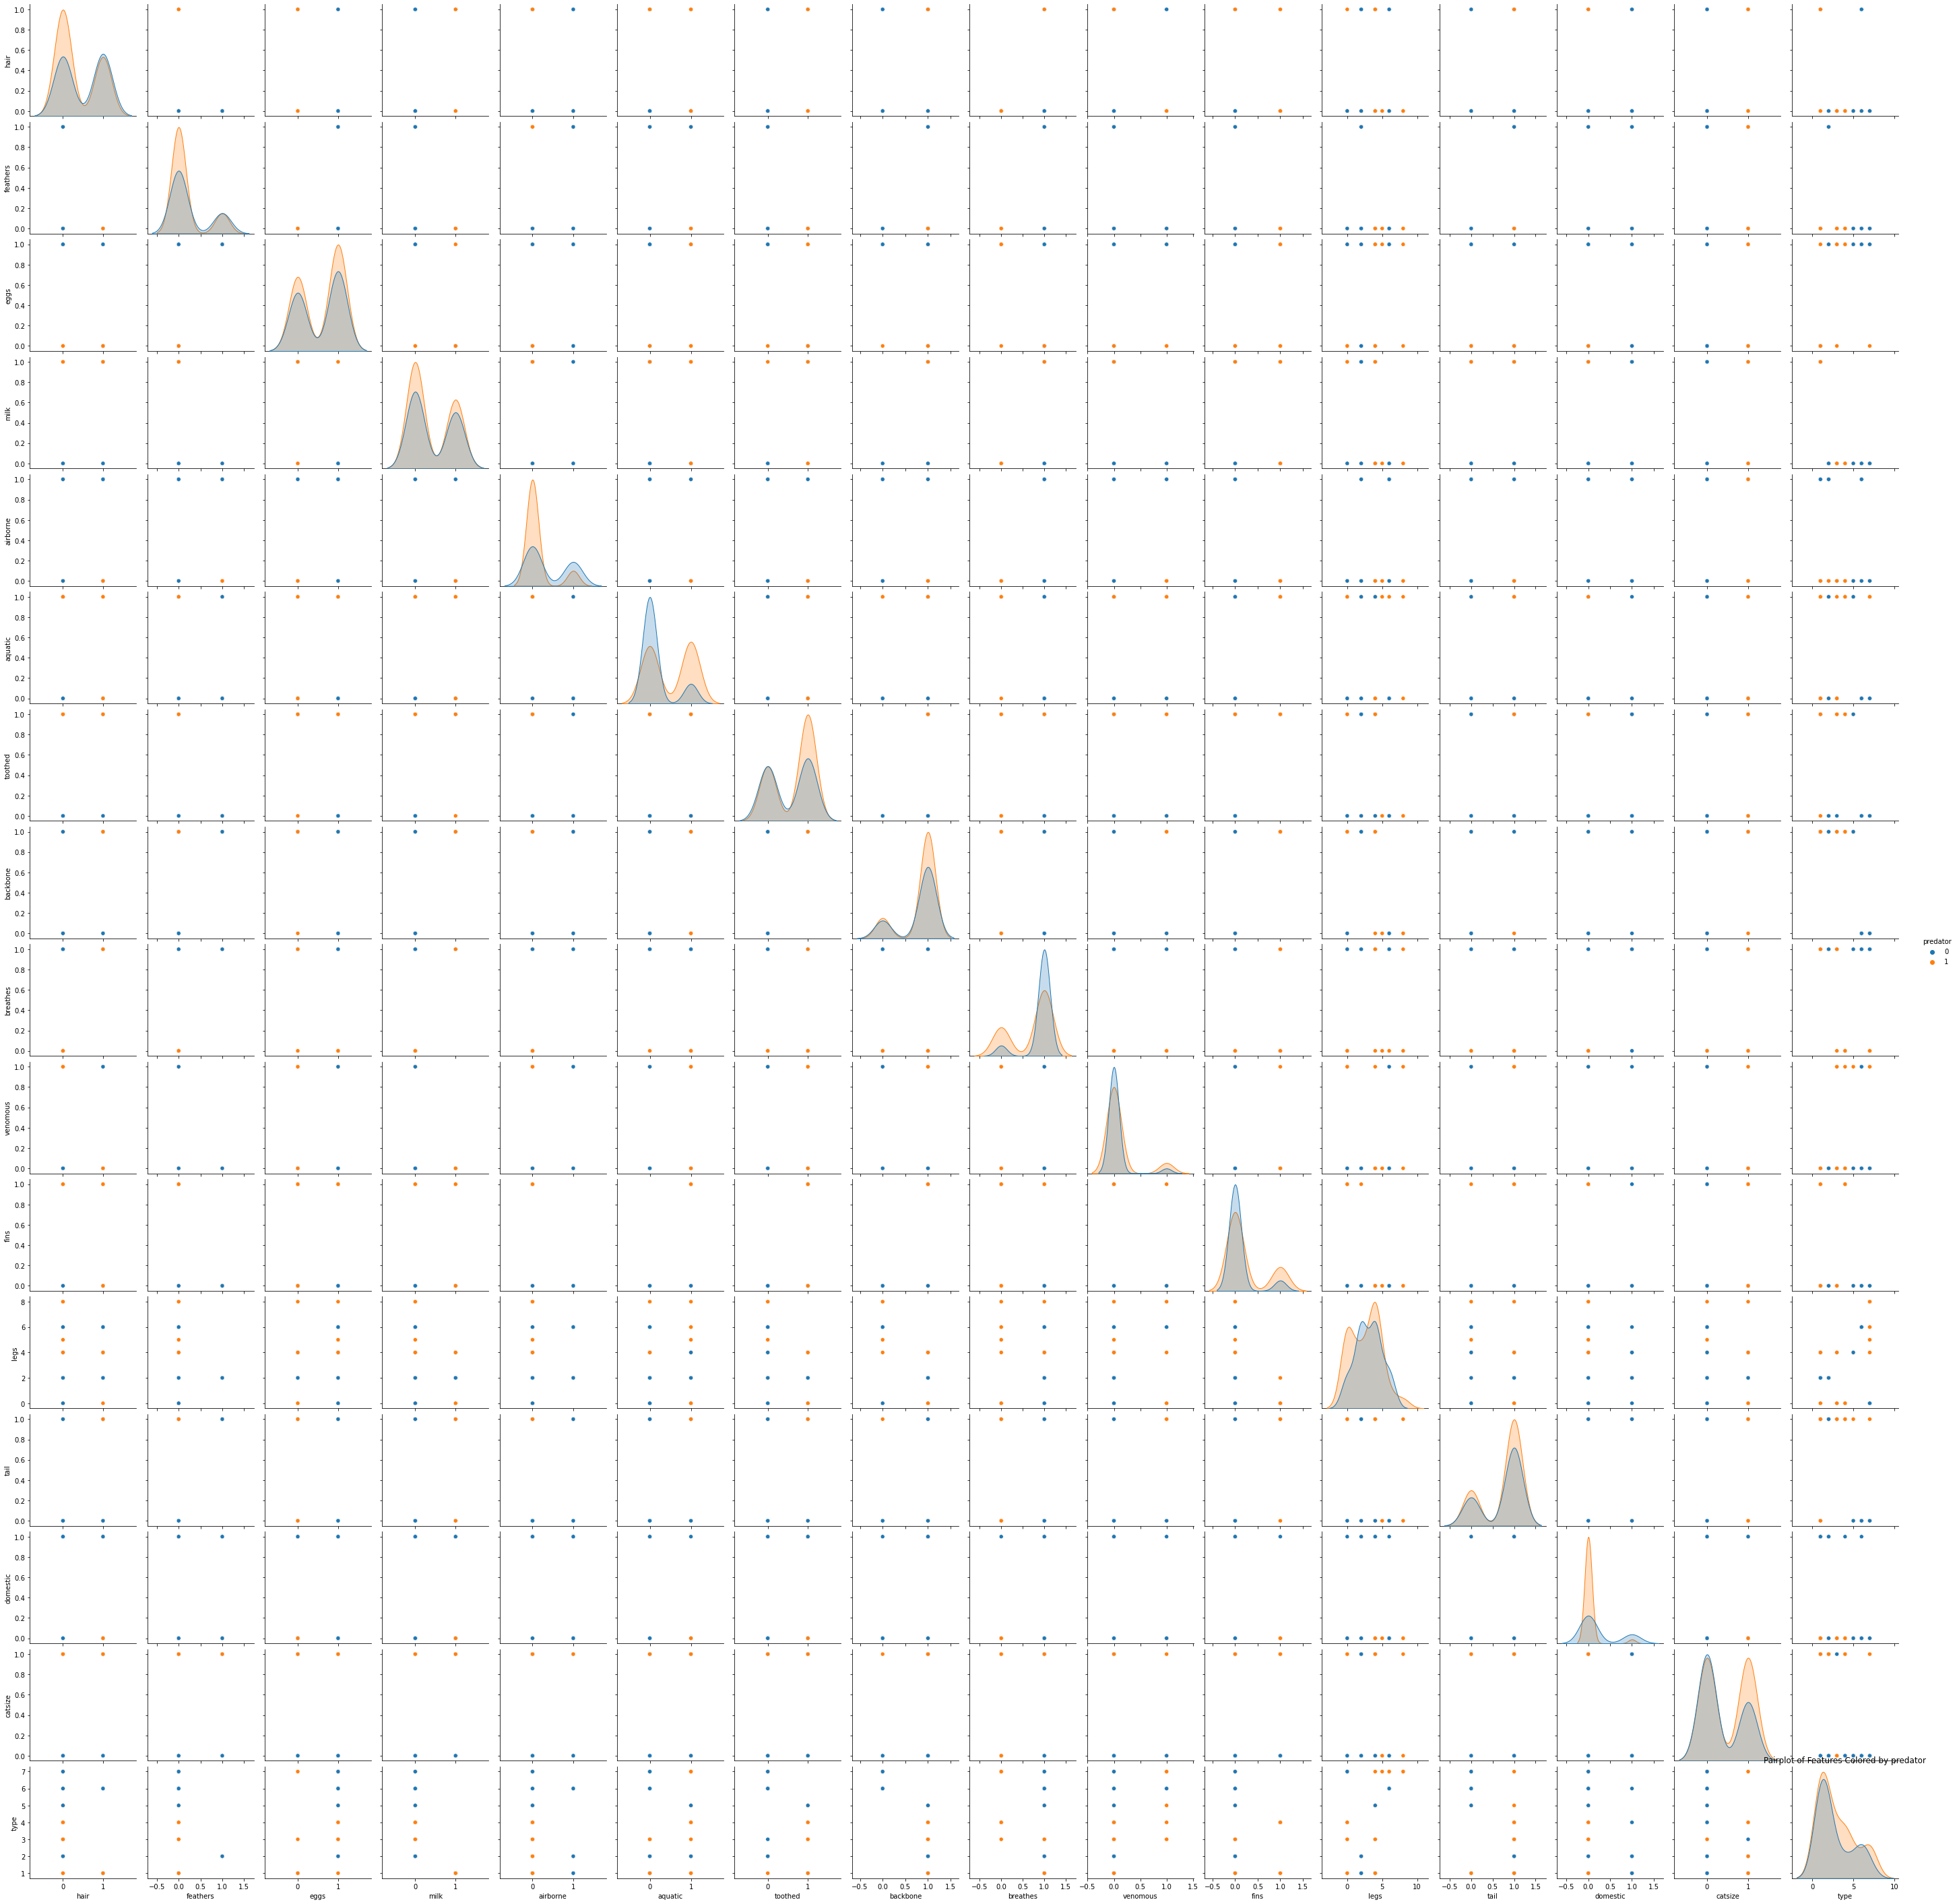

In [8]:
# Pairplot to visualize relationships between features
# Ensure to include the target variable 'class_type' in the pairplot
sns.pairplot(df, hue='predator', diag_kind='kde')
plt.title('Pairplot of Features Colored by predator')
plt.show()

2. Preprocess the data by handling missing values & Outliers, if any.


In [10]:
# Check for missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [33]:
# Separate features and target
X = df.drop(['animal name', 'type'], axis=1)  # Drop non-numerical columns
y = df['type']  # Target variable

In [34]:
# Identify numerical columns
numerical_cols = X.columns

In [35]:
# Define a function to detect outliers using IQR (Interquartile Range)
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[(df_clean[col] >= (Q1 - 1.5 * IQR)) & (df_clean[col] <= (Q3 + 1.5 * IQR))]
    return df_clean

In [36]:
# Apply outlier removal to numerical columns
X_clean = remove_outliers_iqr(X, numerical_cols)

In [37]:
# Check if there are any samples left
if X_clean.shape[0] == 0:
    raise ValueError("No samples left after outlier removal. Check outlier removal process.")

In [38]:
# Synchronize target variable with cleaned features
y_clean = y[X_clean.index]

In [39]:
# Check if X_clean has samples before standardizing
if X_clean.shape[0] > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clean)
    
    # Optionally convert back to DataFrame for easier handling
    X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns)
    print("Data Preprocessing Complete")
else:
    raise ValueError("Feature matrix is empty after standardization.")

Data Preprocessing Complete


3. Split the dataset into training and testing sets (80% training, 20% testing).


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Assuming X_scaled_df and y_clean are already prepared
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_clean, test_size=0.2, random_state=42)

In [42]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (18, 16)
Testing set size: (5, 16)


4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset,


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [44]:
# Step 1: Create and Train the KNN Model
# Choose the value of k (e.g., 5)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)


In [45]:
# Train the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [46]:
# Step 2: Predict on the Test Set
y_pred = knn.predict(X_test)

In [47]:
# Step 3: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5]]


In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [49]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
1.0


5. Choose an appropriate distance metric and value for K



In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


In [51]:
# Step 1: Choose Distance Metric
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

In [52]:
# Step 2: Choose Value for K using Cross-Validation
k_values = range(1, 21)  # Testing K values from 1 to 20


In [53]:
# Initialize the best K and metric
best_k = None
best_metric = None
best_score = 0

In [55]:
for metric in distance_metrics:
    for k in k_values:
        # Initialize KNN with the current metric and K value
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Perform cross-validation
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)
        
        # Update best K and metric
        if mean_score > best_score:
            best_score = mean_score
            best_k = k
            best_metric = metric

C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [56]:
print(f"Best K: {best_k}")
print(f"Best Distance Metric: {best_metric}")
print(f"Best Cross-Validated Accuracy: {best_score}")

Best K: 1
Best Distance Metric: euclidean
Best Cross-Validated Accuracy: 0.9


In [57]:
# Step 3: Train the KNN Model with Optimal Parameters
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [58]:
# Predict on the Test Set
y_pred_best = knn_best.predict(X_test)

In [59]:
# Evaluate the Model
print("Confusion Matrix with Best Parameters:")
print(confusion_matrix(y_test, y_pred_best))


Confusion Matrix with Best Parameters:
[[5]]


In [60]:
print("\nClassification Report with Best Parameters:")
print(classification_report(y_test, y_pred_best))



Classification Report with Best Parameters:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [61]:

print("\nAccuracy Score with Best Parameters:")
print(accuracy_score(y_test, y_pred_best))


Accuracy Score with Best Parameters:
1.0


6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and Ft- score metrics.


In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [63]:
# Assuming `knn_best` is the KNN model trained with the best parameters

# Predict on the Test Set
y_pred_best = knn_best.predict(X_test)

In [69]:
# Get unique class labels from y_test
target_names = [str(cls) for cls in sorted(y_test.unique())]

In [70]:
# Ensure target_names is a list of strings
print("Target Names:", target_names)  # Debugging line to check the target names


Target Names: ['1']


In [71]:
# Evaluate the Model
print("Confusion Matrix with Best Parameters:")
print(confusion_matrix(y_test, y_pred_best))


Confusion Matrix with Best Parameters:
[[5]]


In [72]:
print("\nClassification Report with Best Parameters:")
print(classification_report(y_test, y_pred_best, target_names=target_names))



Classification Report with Best Parameters:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [73]:
print("\nAccuracy Score with Best Parameters:")
print(accuracy_score(y_test, y_pred_best))


Accuracy Score with Best Parameters:
1.0


7. Visualize the decision boundaries of the classifier



In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [75]:
# Step 1: Select Two Features
# For simplicity, we use the first two features (adjust as needed)
X_2d = X_scaled_df.iloc[:, :2].values
y_2d = y_clean


In [76]:
# Step 2: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_2d, y_2d)

KNeighborsClassifier()

In [77]:
# Step 3: Create a Mesh Grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


In [78]:
# Step 4: Predict Class Labels for Each Point in the Grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


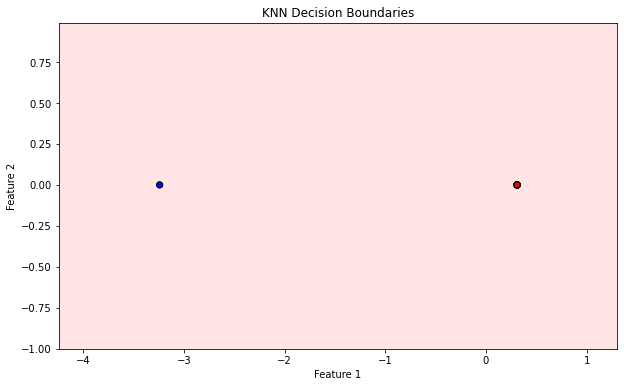

In [79]:
# Step 5: Plot Decision Boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']))
plt.title('KNN Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Interview Questions:



1. What are the key hyperparameters in KNN?


Answer:

In K-Nearest Neighbors (KNN) classification, the key hyperparameters include the number of neighbors (`n_neighbors`), the distance metric (`metric`), and the weight function used for prediction (`weights`). The `n_neighbors` parameter determines how many nearest neighbors are considered when making a prediction; a small value may lead to a model sensitive to noise, while a large value can smooth out the decision boundary but might overlook finer details. The `metric` specifies the distance function used to calculate the proximity between data points, with common choices being Euclidean, Manhattan, or Minkowski distances, each impacting how the algorithm interprets data similarity. The `weights` parameter dictates how the influence of each neighbor is weighted in the prediction; options include uniform weighting (where all neighbors contribute equally) or distance weighting (where closer neighbors have more influence). Tuning these hyperparameters is crucial for optimizing the performance and accuracy of a KNN model.

2. What distance metrics can be used in KNN?

Answer:

In K-Nearest Neighbors (KNN) classification, various distance metrics can be employed to measure the similarity between data points. The most commonly used metric is **Euclidean distance**, which calculates the straight-line distance between two points in the feature space. **Manhattan distance**, also known as the L1 norm or city block distance, sums the absolute differences of their coordinates, which can be more suitable for high-dimensional data. **Minkowski distance** generalizes both Euclidean and Manhattan distances by incorporating a parameter \( p \) that determines the norm used; when \( p=2 \), it corresponds to Euclidean distance, and when \( p=1 \), it corresponds to Manhattan distance. **Cosine similarity** measures the angle between vectors rather than their magnitude, making it useful for text data and high-dimensional spaces where directionality matters more than the exact distance. Each metric can influence the behavior and performance of the KNN algorithm, depending on the nature of the data and the specific problem at hand.